## Analyzing success of games

Historical game data containing user reviews, genres, platforms, and sales will be analyzed to identify patterns that determine whether a game will succeed in 2017 or not.

### Step 1. Open the data file and study the general information

In [ ]:
import pandas as pd

In [ ]:
from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted      12
FIFA 14                           9
Madden NFL 07                     9
Ratatouille                       9
LEGO Marvel Super Heroes          9
                                 ..
MAPLUS: Portable Navi 3           1
Street Fighter EX3                1
Winning Post World 2010           1
Asterix & Obelix: Kick Buttix     1
Monster Rancher                   1
Name: Name, Length: 11559, dtype: int64

In [ ]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.5       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [ ]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Conclusion

`/datasets/games.csv` was opened and analyzed for general information.

There are 2 null values in `df['Name']`, 269 null values in `df['Year_of_Release']`, 2 null values in `df['Genre']`, 8,578 null values in `df['Critic_Score']`, 6701 null values in `df['User_Score']`, and 6766 null values in `df['Rating']`.

The column names would be easier to work with if they were all in lowercase.

The values in `df['Name']` would be better if they were lowercased as well, in case there are any duplicate records in different casing.

`df['Year_of_Release']` would be better if they were converted from a float column datatype into an integer column, since years are typically counted in whole numbers.

Some values in `df['User_Score']` contain the string "tbd". This column should also be converted into a float datatype to accurately represent the values in the column, after the "tbd" string is properly handled.

### Step 2. Preparing the data

#### Lowercasing the column names

In [ ]:
df.columns = map(str.lower, df.columns)

#### Dealing with missing values

In [ ]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
df['name'].fillna("Unknown", inplace=True)

In [ ]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
df['genre'].fillna("Unknown", inplace=True)

Rows 659 and 14244 both contain null values for `name` and `genre`. These null values are converted into the string "Unknown" instead of dropping the rows in order to keep as much available data in our research as possible.

In [ ]:
df.loc[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [ ]:
df['year_of_release'].fillna(-1, inplace=True)

Null values in `df['year_of_release']` are filled in with -1 as an indicator value that the data was not available from the source data. Replacing the null values with the mean or median year for each platform would not be a good idea because doing so may skew the final results toward the replacement year values.

In [ ]:
df.loc[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [ ]:
df['critic_score'].fillna(-1, inplace=True)

In [ ]:
df.loc[df['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN


In [ ]:
df['user_score'].fillna(-1, inplace=True)

-1 is used as a placeholder for all null values in `df['critic_score']` and `df['user_score']` because it is difficult to give an accurate estimate on what the user score for a game would be; all games are different in their own way.

In [ ]:
df.loc[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,-1.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [ ]:
df['user_score'].replace('tbd', -2, inplace=True)

-2 is used as a placeholder for all "tbd" values in `df['user_score']` just like above, since it is hard to give an accurate estimate on what the user score for a game would have been.

In [ ]:
df.loc[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN


In [ ]:
df['rating'].fillna("Unknown", inplace=True)

Null rating values are converted into the string "Unknown".

It is possible that null values exist in `df['year_of_release']`, `df['critic_score']`, `df['user_score']`, and `df['rating']` because the original open source data from which this resulting dataset was sourced from did not record these metrics.

#### Converting the data to the necessary types

In [ ]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [ ]:
df['user_score'] = df['user_score'].astype(float)

#### Checking for duplicate rows

In [ ]:
df['name'] = df['name'].str.lower()

In [ ]:
df.duplicated().sum()

0

#### Calculating the total sales for each game in all regions

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

A new column called `df['total_sales']` was created, containing the sum of sales from all regions.

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


### Conclusion

The column names were lowercased using the `map()` function to make the data easier to work with.

Null values in `df['name']`, `df['genre']`, and `df['rating']` are fillled in the value "Unknown" to indicate that the value was not available from the dataset.

-1 was used to replace null values in `df['year_of_release']` to indicate that the data was not available from the source data. Replacing the null values with the mean or median year for each platform would not be a good idea because doing so may skew the final results toward the replacement year values.

-1 was used as a placeholder for all null values in `df['critic_score']` and `df['user_score']` because it is hard to give an accurate estimate on what the score for a game would be; all games are different in their own way.

Likewise, -2 is used as a placeholder for all "tbd" values in `df['user_score']` because it is also hard to give an accurate estimate on what the user score for a game would have become.

It is possible that these null values existed because the original open source data from which this resulting dataset was sourced from did not record these metrics. 

After converting "tbd" and null values into their appropriate values, `df['year_of_release']` column was converted from a float datatype into an integer datatype since years are counted using whole numbers.

`df['user_score']` column became converted from an object datatype into a float datatype to more accurately represent the values contained in the column, since the column does not contain strings anymore and now exclusively contains float numbers.

Values in `df['name']` is set to lowercase in case there were any duplicated game names in various letter casing that needed to be combined.

`df['total_sales']` is a new column that was created, containing the sum of sales from all regions.

### Step 3. Analyzing the data

[Text(0, 0.5, 'Amount of Games'), Text(0.5, 0, 'Year Released')]

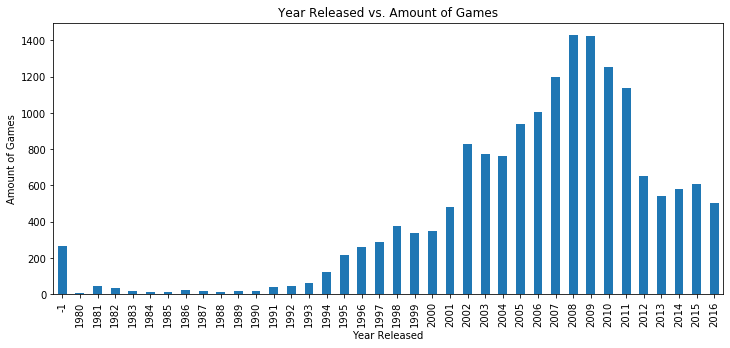

In [ ]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar', title="Year Released vs. Amount of Games", figsize=(12,5)).set(xlabel="Year Released", ylabel="Amount of Games")

In [ ]:
df.loc[df['year_of_release'] < 1995, 'year_of_release'].count()

757

It appears that before 1995, not that many games were released per year. These records only comprise 4.5% of the total data. New releases peaked during 2007-2008.

[Text(0, 0.5, 'Total Sales'), Text(0.5, 0, 'Platform')]

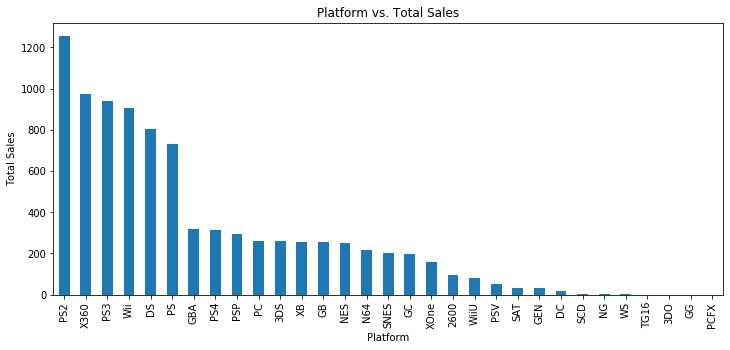

In [ ]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', title="Platform vs. Total Sales", figsize=(12,5)).set(xlabel="Platform", ylabel="Total Sales")

The top 5 platforms by total sales are "PS2", "X360", "PS3", "Wii", and "DS".

[Text(0, 0.5, 'Total PS2 Sales'), Text(0.5, 0, 'Year of Release')]

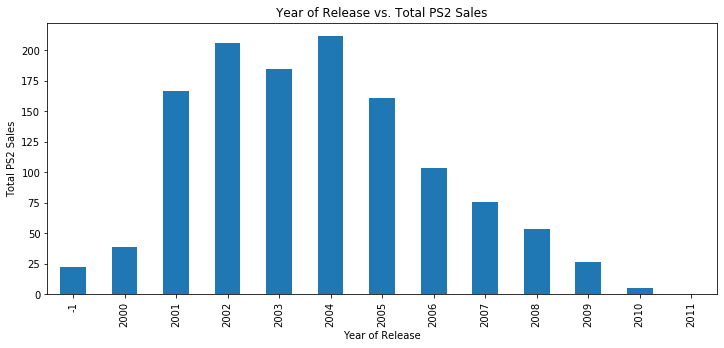

In [ ]:
df.loc[df['platform'] == "PS2"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total PS2 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total PS2 Sales")

[Text(0, 0.5, 'Total Xbox 360 Sales'), Text(0.5, 0, 'Year of Release')]

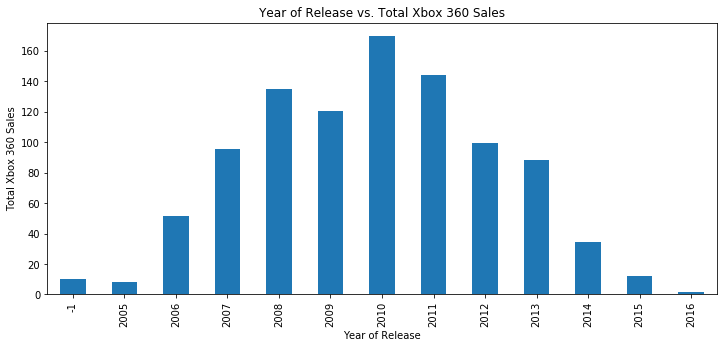

In [ ]:
df.loc[df['platform'] == "X360"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total Xbox 360 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total Xbox 360 Sales")

[Text(0, 0.5, 'Total PS3 Sales'), Text(0.5, 0, 'Year of Release')]

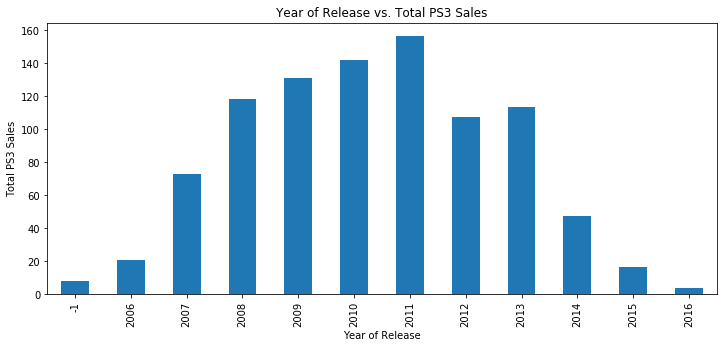

In [ ]:
df.loc[df['platform'] == "PS3"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total PS3 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total PS3 Sales")

[Text(0, 0.5, 'Total Wii Sales'), Text(0.5, 0, 'Year of Release')]

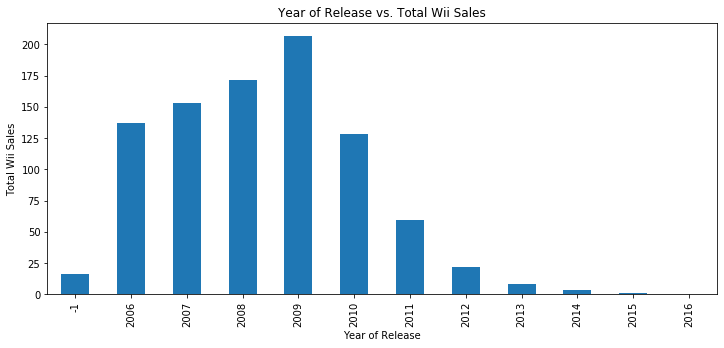

In [ ]:
df.loc[df['platform'] == "Wii"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total Wii Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total Wii Sales")

[Text(0, 0.5, 'Total DS Sales'), Text(0.5, 0, 'Year of Release')]

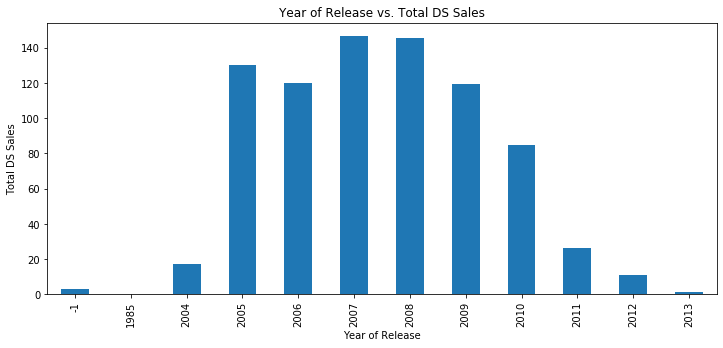

In [ ]:
df.loc[df['platform'] == "DS"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total DS Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total DS Sales")

Of the top 5 selling platforms, PS2 and DS now have 0 sales. Wii has nearly 0 sales for 2016, as well.  The PS3 came out 6 years after the PS2 was released, causing lower sales for the PS2. The top 5 platforms have, on average, a 10 year lifespan.

The data from the most recent 6 years (2011-2016) will be used for analysis. This range was decided based on the amount of data available per year, the average lifespan of a platform, and the time it may take for a newer verion of the platform to be released. Including data from 2010 might not be a good idea because 2010 -> 2011 exhibited a significant drop of sales for the Wii and DS, possibly signaling a new "era" in gaming.

In [ ]:
relevant_df = df.loc[df['year_of_release'] > 2010]

In [ ]:
relevant_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60


In [ ]:
len(relevant_df.index)

4022

The percentage of data that will be considered "relevant" to making predictions for 2017 is 24% of the original dataframe.

[Text(0, 0.5, 'Total Sales'), Text(0.5, 0, 'Platform')]

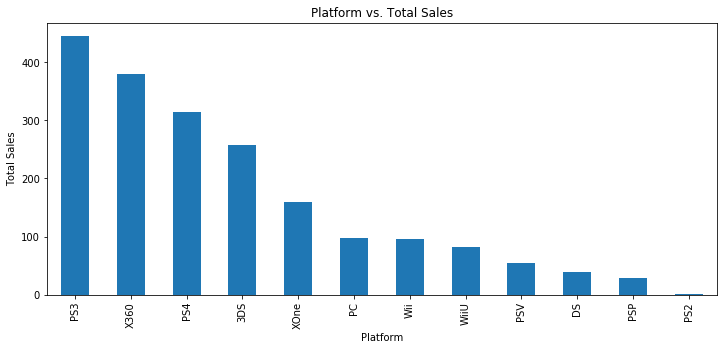

In [ ]:
relevant_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', title="Platform vs. Total Sales", figsize=(12,5)).set(xlabel="Platform", ylabel="Total Sales")

The top 5 platforms in the past 6 years by total sales have been "PS3", "X360", "PS4", "3DS", and "XOne".

[Text(0, 0.5, 'Total PS3 Sales'), Text(0.5, 0, 'Year of Release')]

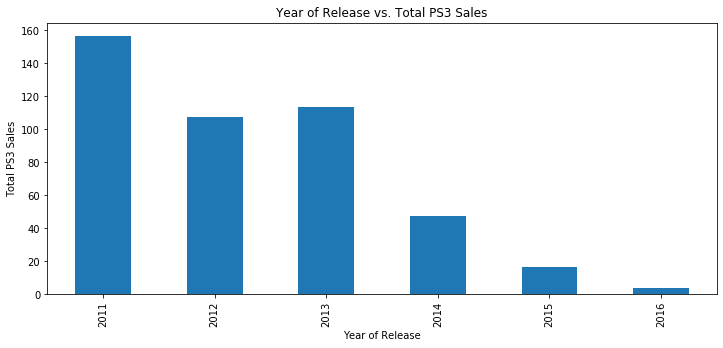

In [ ]:
relevant_df.loc[df['platform'] == "PS3"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total PS3 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total PS3 Sales")

[Text(0, 0.5, 'Total X360 Sales'), Text(0.5, 0, 'Year of Release')]

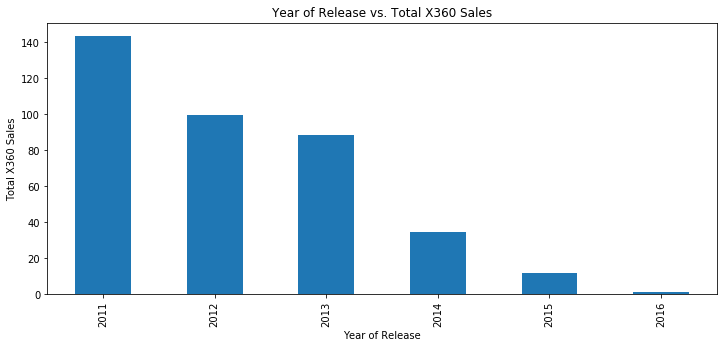

In [ ]:
relevant_df.loc[df['platform'] == "X360"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total X360 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total X360 Sales")

[Text(0, 0.5, 'Total PS4 Sales'), Text(0.5, 0, 'Year of Release')]

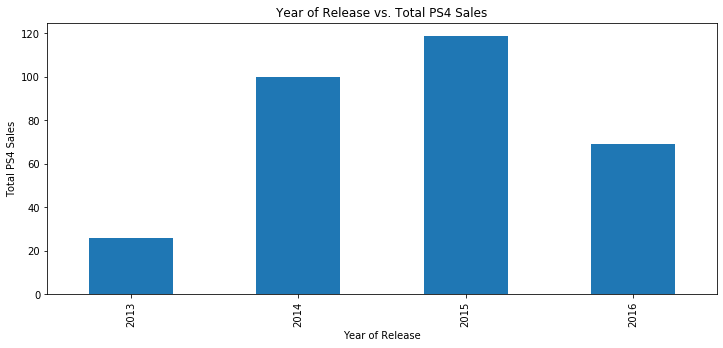

In [ ]:
relevant_df.loc[df['platform'] == "PS4"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total PS4 Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total PS4 Sales")

[Text(0, 0.5, 'Total 3DS Sales'), Text(0.5, 0, 'Year of Release')]

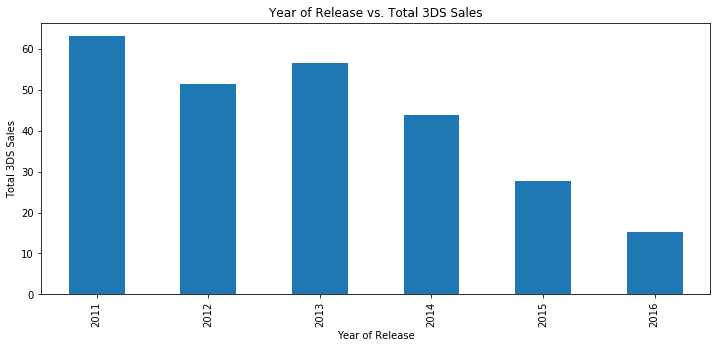

In [ ]:
relevant_df.loc[df['platform'] == "3DS"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total 3DS Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total 3DS Sales")

[Text(0, 0.5, 'Total XOne Sales'), Text(0.5, 0, 'Year of Release')]

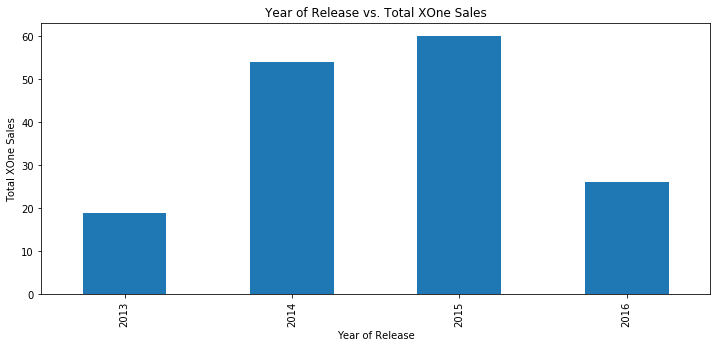

In [ ]:
relevant_df.loc[df['platform'] == "XOne"].groupby('year_of_release')['total_sales'].sum().sort_index().plot(kind='bar', title="Year of Release vs. Total XOne Sales", figsize=(12,5)).set(xlabel="Year of Release", ylabel="Total XOne Sales")

Of the top 5 platforms by total sales in 2011-2016, "PS3", "X360", and "3DS" have been declining in sales. "PS4" and "XOne" sales have been increasing and can be potentially profitable platforms for 2017. The reason why 2016 data looks lower compared to  the rest of the years is because data from 2016 may be incomplete.

Text(0.5, 0, 'Platform')

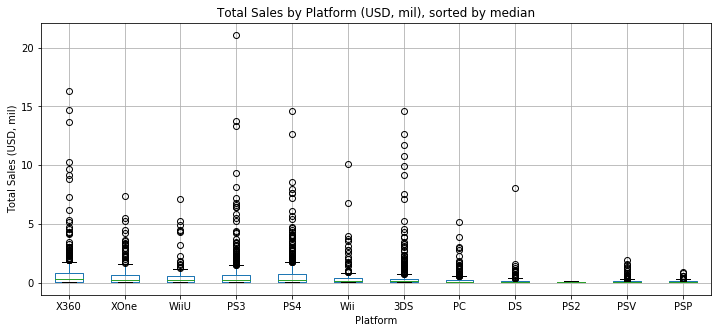

In [ ]:
def boxplot_sorted_outliers(df, by, column, rot=0):
    df_sorted = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df_sorted.median().sort_values(ascending=False)
    return df_sorted[meds.index].boxplot(rot=rot, return_type="axes", figsize=(12,5))
     
df_box = boxplot_sorted_outliers(relevant_df, by='platform', column='total_sales')
df_box.set_title("Total Sales by Platform (USD, mil), sorted by median")
df_box.set_ylabel('Total Sales (USD, mil)')
df_box.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

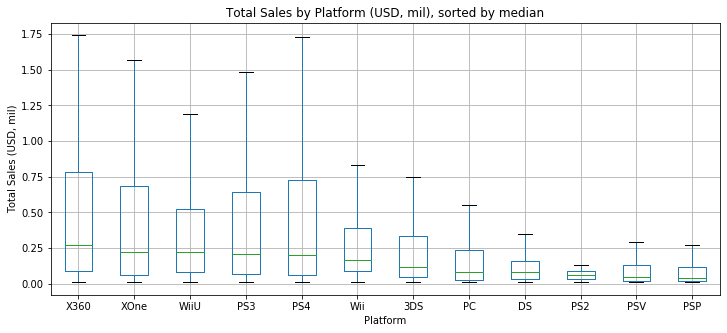

In [ ]:
def boxplot_sorted(df, by, column, rot=0):
    df_sorted = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df_sorted.median().sort_values(ascending=False)
    return df_sorted[meds.index].boxplot(rot=rot, return_type="axes", figsize=(12,5), showfliers=False)
     
df_box2 = boxplot_sorted(relevant_df, by='platform', column='total_sales')
df_box2.set_title('Total Sales by Platform (USD, mil), sorted by median')
df_box2.set_ylabel('Total Sales (USD, mil)')
df_box2.set_xlabel('Platform')

"X360", "XOne", "WiiU", "PS3", and "PS4" have the top 5 amount of global sales, sorted by median. These five platforms also exhibit a greater range of total sales, indicating possible higher profitability. A factor that may be involved would be the average price per game for these platforms.

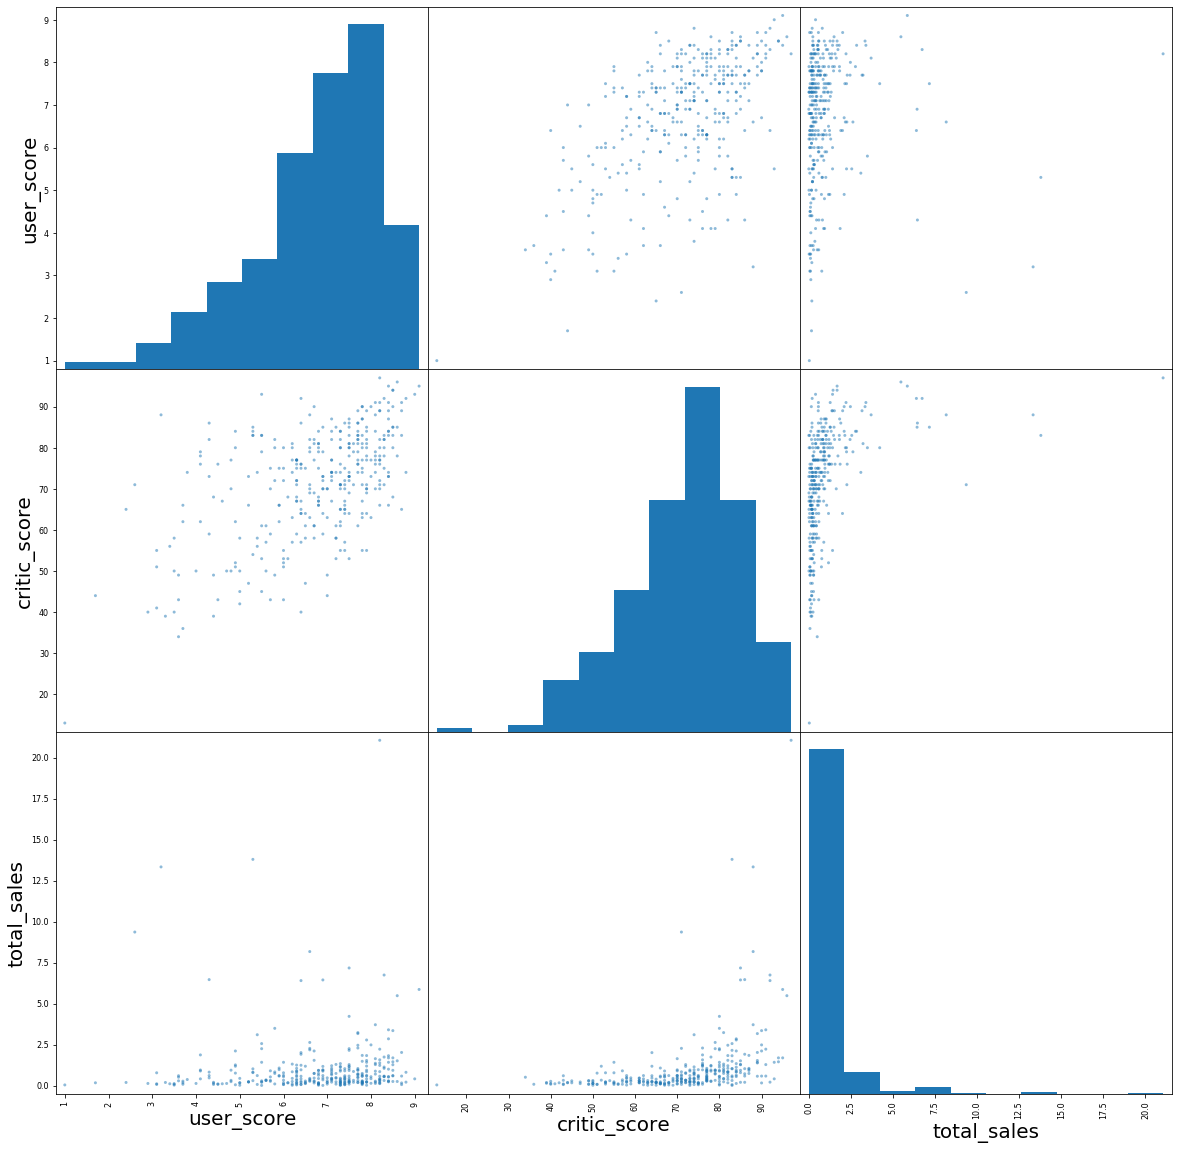

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(relevant_df.query('critic_score > 0 & user_score > 0').loc[relevant_df['platform'] == "PS3"][['user_score', 'critic_score', 'total_sales']], figsize=(20,20))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

In [ ]:
relevant_df.query('critic_score > 0 & user_score > 0').loc[relevant_df['platform'] == "PS3"][['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.563315,0.025189
critic_score,0.563315,1.000000,0.376285
total_sales,0.025189,0.376285,1.000000


When looking at data from the past 6 years which have critic scores and user scores greater than 0, it is found that critic scores have a higher correlation to total sales than do user scores. Critic scores appear to have more weight than user scores when it comes to deciding whether or not to purchase a game.

In [ ]:
dupes = relevant_df['name'].duplicated(keep=False)

In [ ]:
dupes_df = relevant_df.query("@dupes")

In [ ]:
dupes_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


`dupes_df` contains titles that appear across different platforms.

Text(0.5, 0, 'Platform')

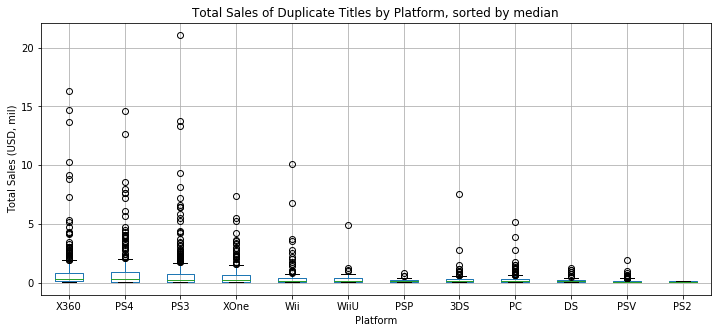

In [ ]:
dupes_box = boxplot_sorted_outliers(dupes_df, by='platform', column='total_sales')
dupes_box.set_title("Total Sales of Duplicate Titles by Platform, sorted by median")
dupes_box.set_ylabel('Total Sales (USD, mil)')
dupes_box.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

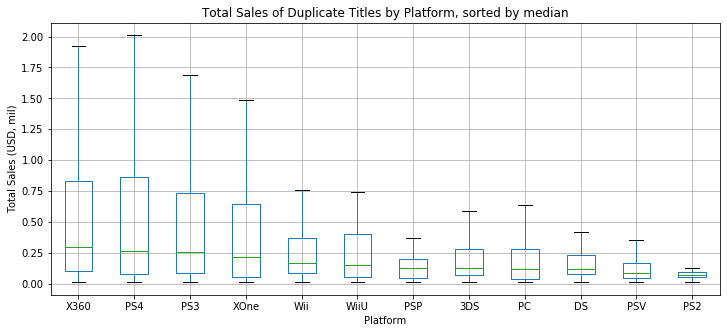

In [ ]:
dupes_box2 = boxplot_sorted(dupes_df, by='platform', column='total_sales')
dupes_box2.set_title("Total Sales of Duplicate Titles by Platform, sorted by median")
dupes_box2.set_ylabel('Total Sales (USD, mil)')
dupes_box2.set_xlabel('Platform')

Titles spanning multiple platforms tend to do the best on the "X360" and "PS4" platforms, followed by "PS3", "XOne", and "Wii" titles. These 5 platforms are the same top 5 platforms ranked by median total sales found earlier from the dataset comprising all titles from 2011-2016.

Text(0.5, 0, 'Genre')

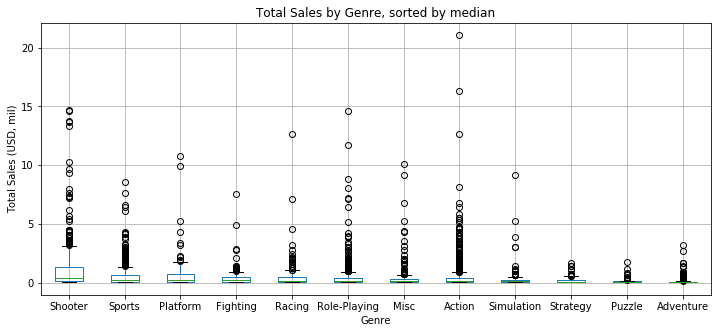

In [ ]:
genre_box = boxplot_sorted_outliers(relevant_df, by='genre', column='total_sales')
genre_box.set_title("Total Sales by Genre, sorted by median")
genre_box.set_ylabel('Total Sales (USD, mil)')
genre_box.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

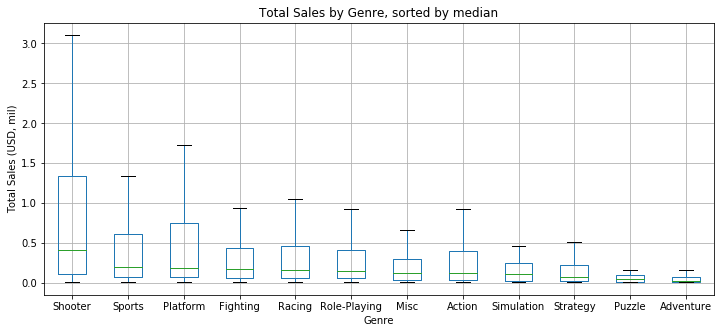

In [ ]:
genre_box = boxplot_sorted(relevant_df, by='genre', column='total_sales')
genre_box.set_title("Total Sales by Genre, sorted by median")
genre_box.set_ylabel('Total Sales (USD, mil)')
genre_box.set_xlabel('Genre')

Shooter games are the most profitable games, while adventure games are the least profitable. The top 3 genres, "Shooter", "Sports", and "Platform", are action-oriented. The lowest selling 3 genres, "Strategy", "Puzzle", and "Adventure", are slower-paced. It appears that the population in the 2011-2016 range has a preference for action-packed games.

### Conclusion

Before 1995, not that many games were released per year. These records only comprise 4.5% of the total data. New releases peaked in 2008 and have generally decreased since then.

Of the top 5 selling platforms, PS2 and DS now have 0 sales. Wii has nearly 0 sales for 2016, as well. The PS3 came out 6 years after the PS2 was released, causing lower sales for the PS2. The top 5 platforms have, on average, a 10 year lifespan.

The data from the most recent 6 years (2011-2016) were used for analysis. This range was decided based on the amount of data available per year, the average lifespan of a platform, and the time it may take for a newer verion of the platform to be released. Including data from 2010 might not be a good idea because 2010 -> 2011 exhibited a significant drop of sales for the Wii and DS, possibly signaling a new "era" in gaming. The percentage of data that will be considered "relevant" to making predictions for 2017 is 24% of the original dataframe.

The top 5 platforms by total sales for the entirety of the dataset are "PS2", "X360", "PS3", "Wii", and "DS".

The top 5 platforms in the past 6 years have been "PS3", "X360", "PS4", "3DS", and "XOne".

Of the top 5 platforms by total sales in 2011-2016, "PS3", "X360", and "3DS" have been declining in sales. "PS4" and "XOne" sales have been increasing and can be potentially profitable platforms for 2017. The reason why 2016 data looks lower compared to  the rest of the years is because data from 2016 may be incomplete.

For the period of 2011-2016, "X360", "XOne", "WiiU", "PS3", and "PS4" have the top 5 amount of global sales, sorted by median. These five platforms also exhibit a greater range of total sales, indicating possible higher profitability. A factor that may be involved would be the average price per game for these platforms.

When looking at data from the past 6 years which have critic scores and user scores greater than 0, it is found that critic scores have a higher correlation to total sales than do user scores. Critic scores appear to have more weight than user scores when it comes to deciding whether or not to purchase a game.

Titles spanning multiple platforms tend to do the best on the "X360" and "PS4" platforms, followed by "PS3", "XOne", and "Wii" titles. These 5 platforms are the same top 5 platforms ranked by median total sales found earlier from the dataset comprising all titles from 2011-2016.

Shooter games are the most profitable games, while adventure games are the least profitable. The top 3 genres, "Shooter", "Sports", and "Platform", are action-oriented. The lowest selling 3 genres, "Strategy", "Puzzle", and "Adventure", are slower-paced. It appears that the population in the 2011-2016 range has a preference for action-packed games.

### Step 4. Creating a user profile for each region

#### Determining the top five platforms per region

Text(0.5, 0, 'Platform')

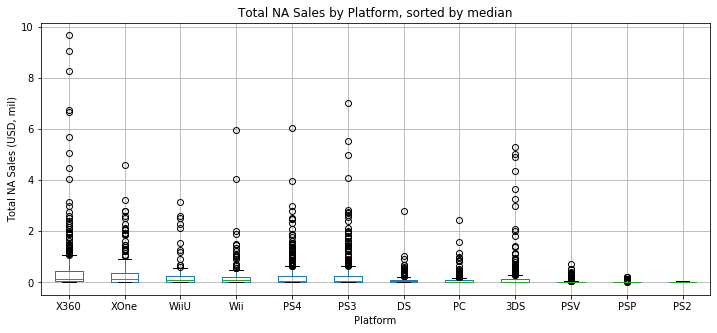

In [ ]:
na_platform = boxplot_sorted_outliers(relevant_df, by='platform', column='na_sales')
na_platform.set_title("Total NA Sales by Platform, sorted by median")
na_platform.set_ylabel('Total NA Sales (USD, mil)')
na_platform.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

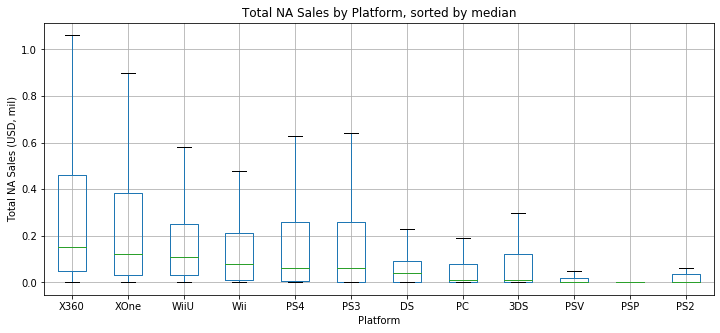

In [ ]:
na_platform2 = boxplot_sorted(relevant_df, by='platform', column='na_sales')
na_platform2.set_title("Total NA Sales by Platform, sorted by median")
na_platform2.set_ylabel('Total NA Sales (USD, mil)')
na_platform2.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

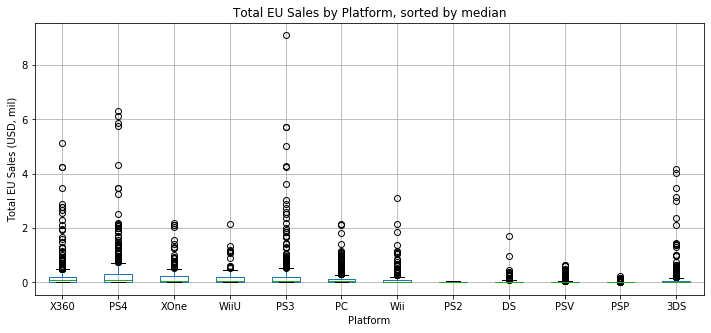

In [ ]:
eu_platform = boxplot_sorted_outliers(relevant_df, by='platform', column='eu_sales')
eu_platform.set_title("Total EU Sales by Platform, sorted by median")
eu_platform.set_ylabel('Total EU Sales (USD, mil)')
eu_platform.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

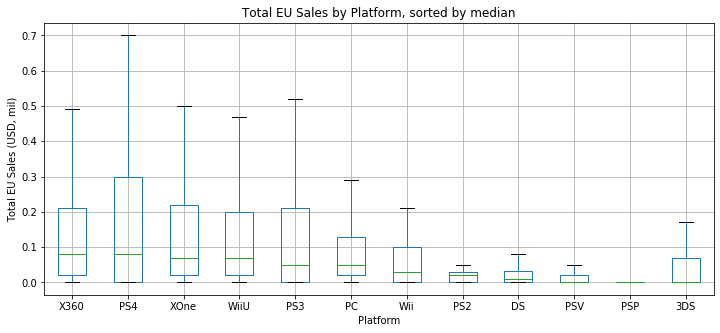

In [ ]:
eu_platform2 = boxplot_sorted(relevant_df, by='platform', column='eu_sales')
eu_platform2.set_title("Total EU Sales by Platform, sorted by median")
eu_platform2.set_ylabel('Total EU Sales (USD, mil)')
eu_platform2.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

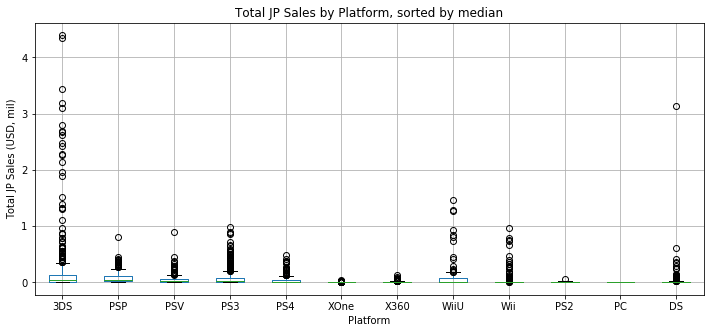

In [ ]:
jp_platform = boxplot_sorted_outliers(relevant_df, by='platform', column='jp_sales')
jp_platform.set_title("Total JP Sales by Platform, sorted by median")
jp_platform.set_ylabel('Total JP Sales (USD, mil)')
jp_platform.set_xlabel('Platform')

Text(0.5, 0, 'Platform')

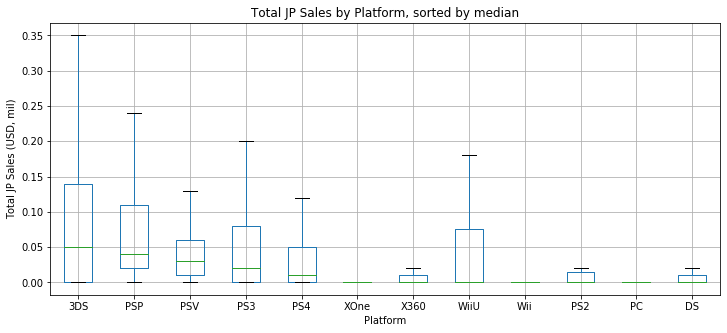

In [ ]:
jp_platform2 = boxplot_sorted(relevant_df, by='platform', column='jp_sales')
jp_platform2.set_title("Total JP Sales by Platform, sorted by median")
jp_platform2.set_ylabel('Total JP Sales (USD, mil)')
jp_platform2.set_xlabel('Platform')

In [ ]:
relevant_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].median()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.01,0.00,0.05
DS,0.04,0.01,0.00
PC,0.01,0.05,0.00
PS2,0.00,0.02,0.00
PS3,0.06,0.05,0.02
PS4,0.06,0.08,0.01
PSP,0.00,0.00,0.04
PSV,0.00,0.00,0.03
Wii,0.08,0.03,0.00


The top 5 platforms in the NA region by median sale per game are: "X360", "XOne", "WiiU", "Wii", and "PS4", in descending order.

The top 5 platforms in the EU region by median sale per game are: "X360", "PS4", "XOne", "WiiU", and "PS3", in descending order.

The top 5 platforms in the JP region by median sale per game are: "3DS", "PSP", "PSV", "PS3", and "PS4", in descending order. Many "XOne", "X360", "WiiU", "Wii", "PS2", "PC", and "DS" titles do not have sales data in Japan, resulting in a 0 median for JP sales. One reason for this might be because many of the games in the dataset were localized for English speakers and not for Japanese speakers.

Handheld platforms are more popular in Japan, where the top 3 platforms are "3DS", "PSP", and "PSV".

NA and EU data shows more popularity within the home console platforms, with the Wii having a slightly larger market share in NA than EU and PC gaming having a slightly larger market share in EU than NA.

#### Determining the top five genres per region

Text(0.5, 0, 'Genre')

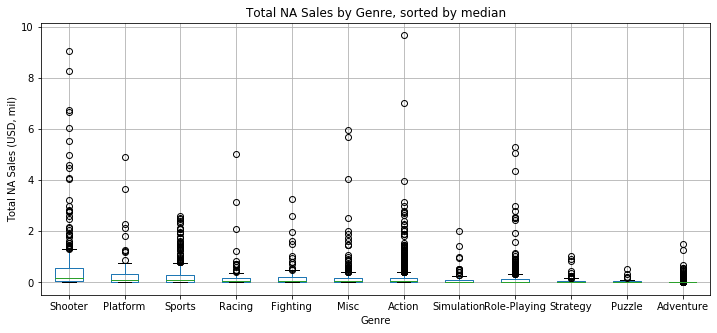

In [ ]:
na_genres = boxplot_sorted_outliers(relevant_df, by='genre', column='na_sales')
na_genres.set_title("Total NA Sales by Genre, sorted by median")
na_genres.set_ylabel('Total NA Sales (USD, mil)')
na_genres.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

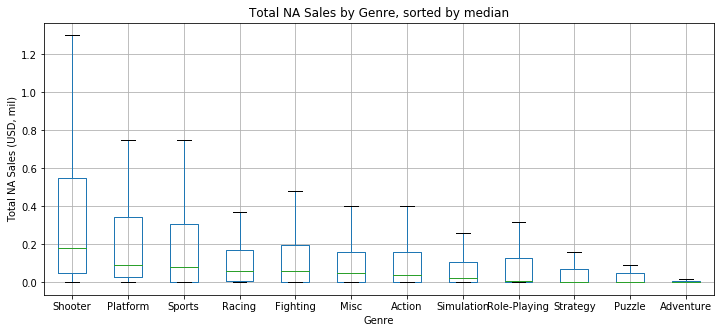

In [ ]:
na_genres2 = boxplot_sorted(relevant_df, by='genre', column='na_sales')
na_genres2.set_title("Total NA Sales by Genre, sorted by median")
na_genres2.set_ylabel('Total NA Sales (USD, mil)')
na_genres2.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

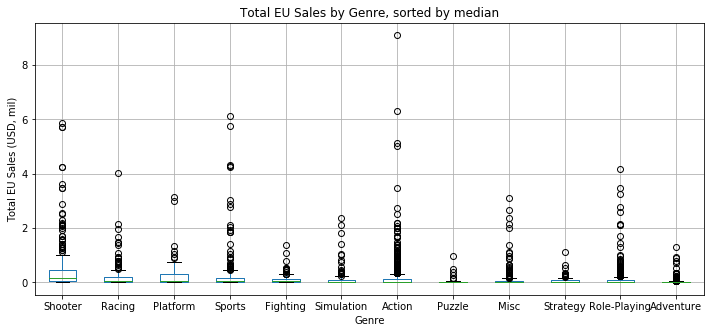

In [ ]:
eu_genres = boxplot_sorted_outliers(relevant_df, by='genre', column='eu_sales')
eu_genres.set_title("Total EU Sales by Genre, sorted by median")
eu_genres.set_ylabel('Total EU Sales (USD, mil)')
eu_genres.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

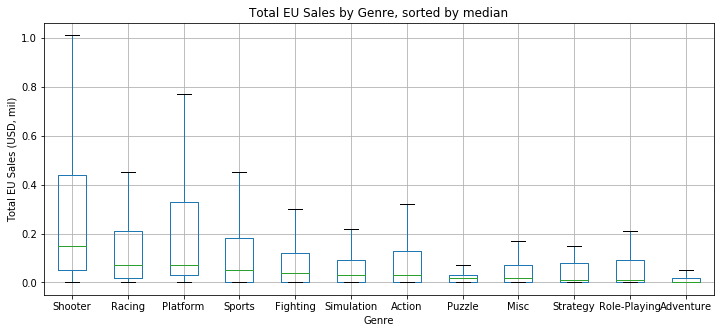

In [ ]:
eu_genres2 = boxplot_sorted(relevant_df, by='genre', column='eu_sales')
eu_genres2.set_title("Total EU Sales by Genre, sorted by median")
eu_genres2.set_ylabel('Total EU Sales (USD, mil)')
eu_genres2.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

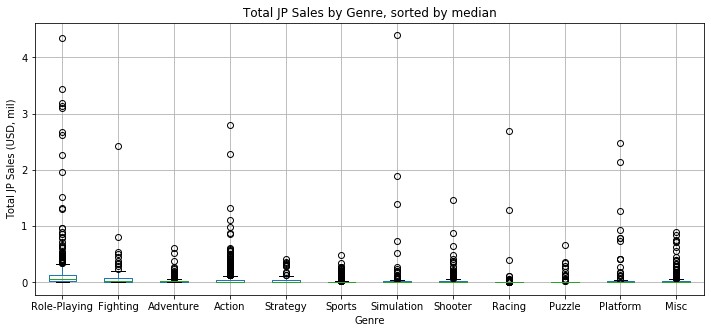

In [ ]:
jp_genres = boxplot_sorted_outliers(relevant_df, by='genre', column='jp_sales')
jp_genres.set_title("Total JP Sales by Genre, sorted by median")
jp_genres.set_ylabel('Total JP Sales (USD, mil)')
jp_genres.set_xlabel('Genre')

Text(0.5, 0, 'Genre')

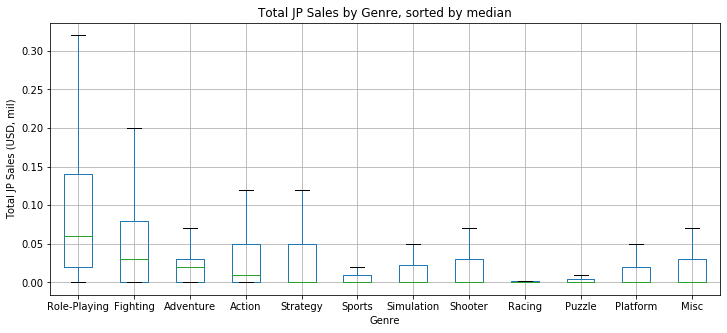

In [ ]:
jp_genres2 = boxplot_sorted(relevant_df, by='genre', column='jp_sales')
jp_genres2.set_title("Total JP Sales by Genre, sorted by median")
jp_genres2.set_ylabel('Total JP Sales (USD, mil)')
jp_genres2.set_xlabel('Genre')

The top 5 genres in the NA region by median sale per game are: "Shooter", "Platform", "Sports", "Racing", and "Fighting", in descending order.

The top 5 genres in the EU region by median sale per game are: "Shooter", "Racing", "Platform", "Sports", and "Fighting", in descending order.

The top 5 genres in the JP region by median sale per game are: "Role-Playing", "Fighting", "Adventure", "Action", and "Strategy", in descending order.

The NA and EU regions contain the same top five genres, while the top 5 genres in JP are very different. The 3 lowest genres by median sale price in NA and EU are among the top 5 in JP, with role-playing games at #1.

#### Checking if ESRB ratings affect sales in individual regions

Text(0.5, 0, 'Rating')

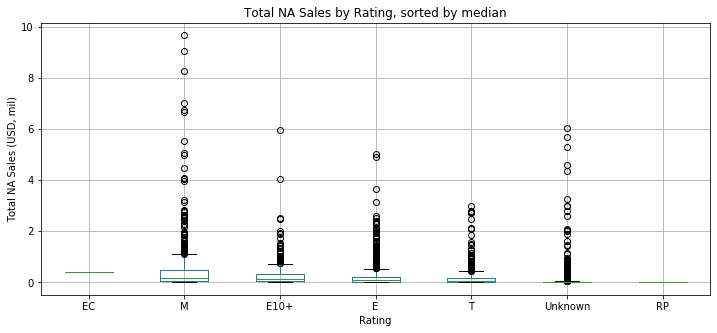

In [ ]:
na_ratings = boxplot_sorted_outliers(relevant_df, by='rating', column='na_sales')
na_ratings.set_title("Total NA Sales by Rating, sorted by median")
na_ratings.set_ylabel('Total NA Sales (USD, mil)')
na_ratings.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

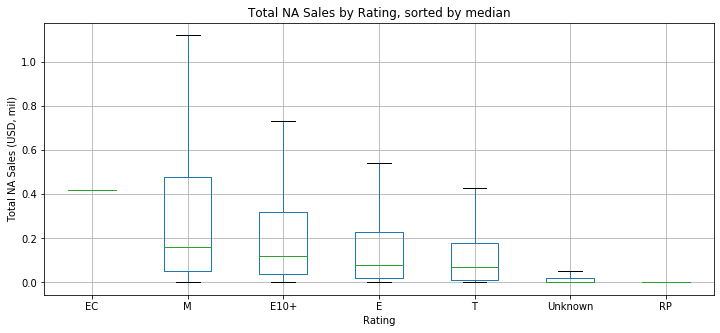

In [ ]:
na_ratings2 = boxplot_sorted(relevant_df, by='rating', column='na_sales')
na_ratings2.set_title("Total NA Sales by Rating, sorted by median")
na_ratings2.set_ylabel('Total NA Sales (USD, mil)')
na_ratings2.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

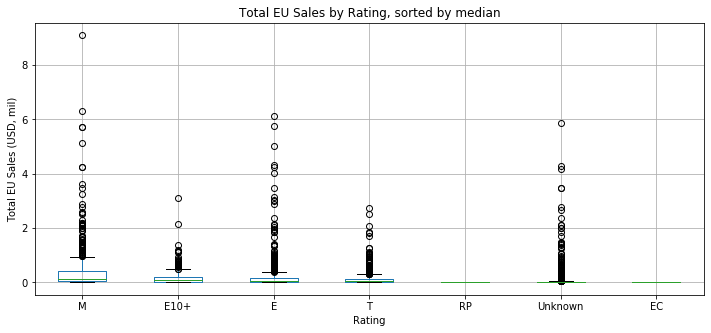

In [ ]:
eu_ratings = boxplot_sorted_outliers(relevant_df, by='rating', column='eu_sales')
eu_ratings.set_title("Total EU Sales by Rating, sorted by median")
eu_ratings.set_ylabel('Total EU Sales (USD, mil)')
eu_ratings.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

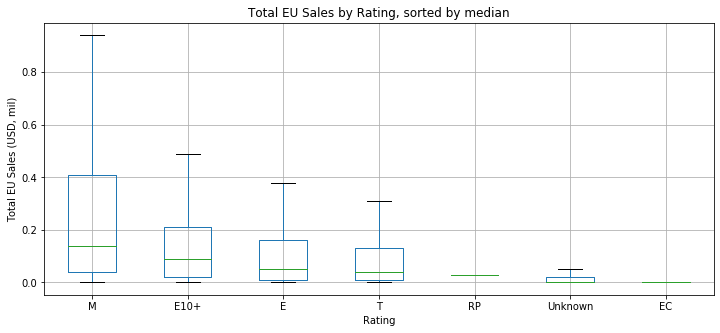

In [ ]:
eu_ratings2 = boxplot_sorted(relevant_df, by='rating', column='eu_sales')
eu_ratings2.set_title("Total EU Sales by Rating, sorted by median")
eu_ratings2.set_ylabel('Total EU Sales (USD, mil)')
eu_ratings2.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

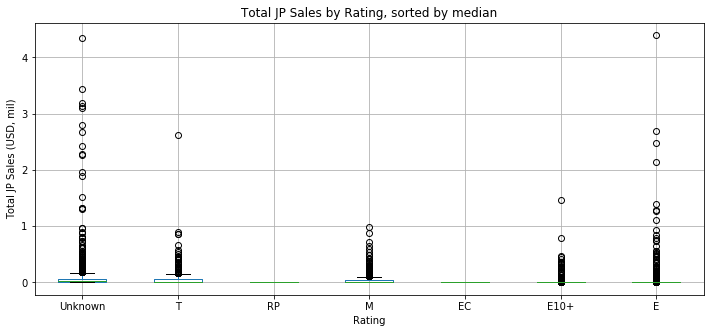

In [ ]:
jp_ratings = boxplot_sorted_outliers(relevant_df, by='rating', column='jp_sales')
jp_ratings.set_title("Total JP Sales by Rating, sorted by median")
jp_ratings.set_ylabel('Total JP Sales (USD, mil)')
jp_ratings.set_xlabel('Rating')

Text(0.5, 0, 'Rating')

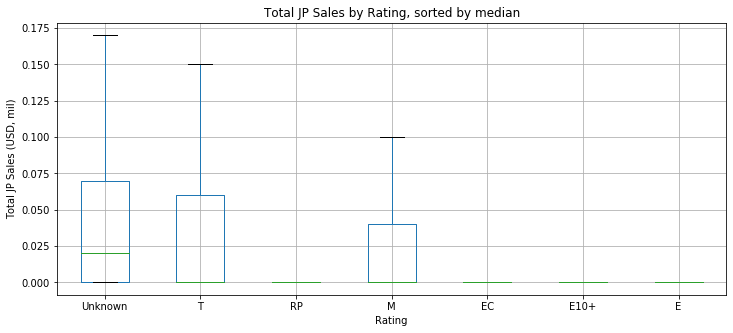

In [ ]:
jp_ratings2 = boxplot_sorted(relevant_df, by='rating', column='jp_sales')
jp_ratings2.set_title("Total JP Sales by Rating, sorted by median")
jp_ratings2.set_ylabel('Total JP Sales (USD, mil)')
jp_ratings2.set_xlabel('Rating')

The effect of ESRB ratings on sales seem to be about the same for NA and EU except for the EC rating, where it is higher in NA. Games rated Mature seem to do well in these two regions. It is possible that regions outside NA such as JP use different rating systems, which complicates the ability to make a proper conclusion across regions.

<div class="alert alert-success" role="alert">
Correct, just wondering, why are you compare them by the median. I think absolute values seem more logical.
I see you like boxplotes :)</div>

### Conclusion

Platform and Genre trends are consistent between NA and EU regions for the years spanning 2011-2016.

The JP market prefers handheld platforms than home console platforms, and the genres that the JP market has had the highest median sales in are the same genres that have not done as well the NA and EU market.

The ESRB is primarily used in NA, while the other regions use their own rating systems. However, it is found that the effect of ESRB ratings on sales seem to be about the same for NA and EU. Games rated Mature seem to do well in these two regions.

### Step 5. Testing the hypotheses

#### Test 1. Average user ratings of the Xbox One and PC platforms are the same.

In [ ]:
valid_scores_subset = relevant_df.query('user_score > 0')

In [ ]:
st.levene(valid_scores_subset.loc[valid_scores_subset['platform'] == 'PC', 'user_score'], valid_scores_subset.loc[valid_scores_subset['platform'] == 'XOne', 'user_score'])

LeveneResult(statistic=5.516327585628806, pvalue=0.019238606822499546)

In [ ]:
rating_plats_subset = st.ttest_ind(valid_scores_subset.loc[valid_scores_subset['platform'] == 'PC', 'user_score'], valid_scores_subset.loc[valid_scores_subset['platform'] == 'XOne', 'user_score'], equal_var = False)

alpha = .05

print('p-value: ', rating_plats_subset.pvalue)

if (rating_plats_subset.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We fail to reject the null hypothesis")

p-value:  0.6130712247638477
We fail to reject the null hypothesis


H0: The average user ratings of the Xbox One and PC platforms are the same

H1: The average user ratings of the Xbox One and PC platforms are different

`equal_var` is set to False in the data from 2011-2016 because the p-value returned from Levene's test is less than 0.5. Also, the Xbox One has seen higher median sales than PC games, which may have an effect on user rating variances.

When evaluating the years 2011-2016, the resulting p-value is greater than 0.05, so we fail to reject the null hypothesis. The average user ratings of the Xbox One and PC platforms are the same.

#### Test 2. Average user ratings for the Action and Sports genres are different.

In [ ]:
st.levene(valid_scores_subset.loc[valid_scores_subset['genre'] == 'Action', 'user_score'], valid_scores_subset.loc[valid_scores_subset['genre'] == 'Sports', 'user_score'])

LeveneResult(statistic=18.398485636804207, pvalue=1.9840382117903915e-05)

In [ ]:
rating_genres_subset = st.ttest_ind(valid_scores_subset.loc[valid_scores_subset['genre'] == 'Action', 'user_score'], valid_scores_subset.loc[valid_scores_subset['genre'] == 'Sports', 'user_score'], equal_var = False)

alpha = .05

print('p-value: ', rating_genres_subset.pvalue)

if (rating_genres_subset.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We fail to reject the null hypothesis")

p-value:  8.285648549432565e-19
We reject the null hypothesis


H0: The average user ratings for the Action and Sports genres are the same

H1: The average user ratings for the Action and Sports genres are different

`equal_var` is set to False because the p-values returned from Levene's test is less than 0.5. Sports games also have exhibited higher median sales than action games, which may have an effect on user rating variances.

When evaluating the years 2011-2016, the p-value is less than 0.05, so we reject the null hypothesis. The average user ratings for the Action and Sports genres are different.

### Conclusion

Data from 2011-2016 was used for these two hypothesis tests. Levene's test and research findings were used to determine if there was a significant difference between variances.

For the 2011-2016 period, the average user ratings of the Xbox One and PC platforms are the same, while the average user ratings for the Action and Sports genres are different.

### Step 6. General Conclusion

`/datasets/games.csv` was opened and analyzed for general information.

Column names and game titles were lowercased, and 22,318 null values were filled in `df['Name']`, `df['Year_of_Release']`, `df['Genre']`, `df['Critic_Score']`, `df['User_Score']`, `df['Rating']`. "Tbd" strings were replaced with a placeholder value.

Data from 2011-2016 was selected based on the amount of data available per year, the average lifespan of a platform, and the time it may take for a newer verion of the platform to be released. This percentage of data that will be considered "relevant" to making predictions for 2017 is 24% of the original dataframe.

Of the top 5 platforms by total sales in 2011-2016, "PS3", "X360", and "3DS" have been declining in sales. "PS4" and "XOne" sales have been increasing and can be potentially profitable platforms for 2017.

Critic scores appear to have more weight than user scores when it comes to deciding whether or not to purchase a game.

Titles spanning multiple platforms tend to do the best on the "X360" and "PS4" platforms, followed by "PS3", "XOne", and "Wii" titles.

The top 5 genres in the NA and EU region by median sale per game are: "Shooter", "Platform", "Sports", "Racing", and "Fighting". It is different from JP sales, where the top 5 genres by median sale per game are: "Role-Playing", "Fighting", "Adventure", "Action", and "Strategy", in descending order.

The JP market prefers handheld platforms than home console platforms, and the genres that the JP market has had the highest median sales in are the same genres that have not done as well the NA and EU market.